In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)

In [3]:
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr, cr)

In [5]:
%matplotlib inline

In [6]:
circuit.draw(initial_state=True)

q0_0: |0>
         
q0_1: |0>
         
 c0: 0 2/

In [7]:
# Hadamard Gate
# sets the probability of qubit qr[0] to be 50% "0" and 50% "1"
circuit.h(qr[0])

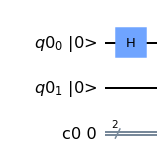

In [8]:
circuit.draw(initial_state=True, output='mpl')

In [9]:
# Controlled NOT Gate (CNOT Gate)
# if target qubit == 0  -->  do nothing
# if target qubit == 1  -->  flip control qubit
# in this case, qr[0] is the control qubit and qr[1] is the target qubit
circuit.cx(qr[0], qr[1])

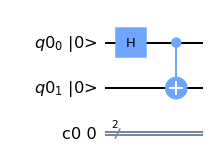

In [10]:
circuit.draw(initial_state=True, output='mpl')

In [11]:
# Measure
# causing qubits to collapse to a specific value ("0" or "1")
circuit.measure(qr, cr)

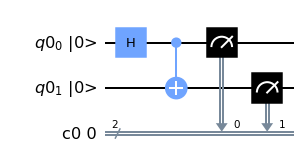

In [12]:
circuit.draw(initial_state=True, output='mpl')

In [13]:
simulator = Aer.get_backend("qasm_simulator")

In [14]:
# Simulate circuit using our classical computer
result = execute(circuit, backend = simulator).result()

In [15]:
from qiskit.tools.visualization import plot_histogram

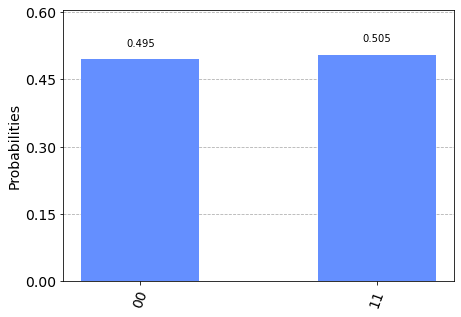

In [16]:
plot_histogram(result.get_counts(circuit))

In [17]:
# This will NOT work unless ep2.ipynb is ran beforehand
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider = IBMQ.get_provider('ibm-q')

In [19]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [20]:
# Execute circuit on a real IBM quantum computer
job = execute(circuit, backend = qcomp)

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
# This may take a while depending on how long the queue is
job_monitor(job)

Job Status: job has successfully run


In [23]:
result = job.result()

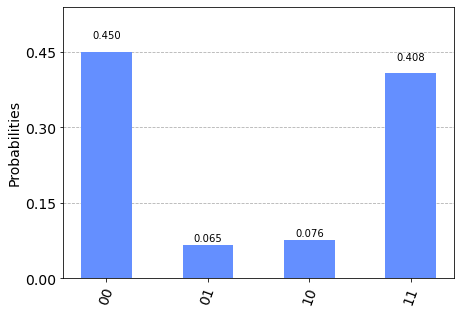

In [24]:
# The results on the quantum computer are different (it includes states 01 and 10) from
# the classical computer simulation because the classical computer simulates a perfect
# quantum computer; however, quantum computers nowadays are not that perfect yet and will
# have errors.
plot_histogram(result.get_counts(circuit))